In [1]:
# script to determine the way to pick second gsf track associated to the electron cluster.
import ROOT
from plugins.CMS_lumi import CMS_lumi
from plugins.sigmaEff import sigmaEff

Welcome to JupyROOT 6.24/06


In [2]:
ROOT.EnableImplicitMT()
rdf = ROOT.RDataFrame("outTree", "./minitree/2017/Minitree_HDalitz_*.root")

In [3]:
%%time 

arr = rdf.Filter("category == 2").AsNumpy(columns = ["meeRatio", "meeRatioPtMax"])

xmin_dr, xmax_dr, sigma_dr = sigmaEff(arr["meeRatio"], threshold = 0.683)
print("smallest dR: eff sigma = {}".format(sigma_dr))

xmin_pt, xmax_pt, sigma_pt = sigmaEff(arr["meeRatioPtMax"], threshold = 0.683)
print("highest pT: eff sigma = {}".format(sigma_pt))

smallest dR: eff sigma = 2.4928312900397005
highest pT: eff sigma = 2.713561924069922
CPU times: user 6.01 s, sys: 627 ms, total: 6.63 s
Wall time: 5.7 s


In [4]:
def Draw1DHist(c, vh, vc, vcl , xaxis = "x-axis", yaxis = "x-axis", option = "hist", Log = True):
    ROOT.gPad.SetRightMargin(0.05)
    ROOT.gPad.SetTopMargin(0.07)
    ROOT.gPad.SetLeftMargin(0.14)
    ROOT.gPad.SetBottomMargin(0.15)
    if (Log == True):
        c.SetLogy()

    # Set the axis style
    if (Log == True):
        ymax = vh[0].GetBinContent(vh[0].GetMaximumBin()) * 10
        ymin = 1E-1
    else: 
        ymax = vh[0].GetBinContent(vh[0].GetMaximumBin()) * 1.5
        ymin = 0
    vh[0].SetMarkerStyle(20)
    vh[0].SetMarkerSize(1.2)
    vh[0].GetXaxis().SetTitle(xaxis)
    vh[0].GetXaxis().SetMoreLogLabels()
    # vh[0].GetXaxis().SetTickSize(0.02)
    vh[0].GetXaxis().SetTitleSize(0.05)
    vh[0].GetXaxis().SetLabelSize(0.045)
    vh[0].GetXaxis().SetLabelOffset(0.02)
    vh[0].GetXaxis().SetTitleOffset(1.4)
    vh[0].GetYaxis().SetTitle(yaxis)
    vh[0].GetYaxis().SetRangeUser(ymin, ymax)
    # vh[0].GetYaxis().SetNdivisions(506)
    # vh[0].GetYaxis().SetTickSize(0.02)
    vh[0].GetYaxis().SetTitleSize(0.05)
    vh[0].GetYaxis().SetLabelSize(0.045)
    # vh[0].GetYaxis().SetLabelOffset(0.02)
    vh[0].GetYaxis().SetTitleOffset(1.4)

    # Set the color style and draw option
    for i, h in enumerate(vh):
        h.SetLineColor(ROOT.TColor.GetColor(vcl[i]))
        h.SetLineWidth(2)
        if (vc[i] != None):
            h.SetFillColor(ROOT.TColor.GetColor(vc[i]))
        if (i == 0):
            h.Draw(option)
        else:
            h.Draw("%s same" %(option))

CMS (Preliminary) out of frame? --> True
lumiText =   (13 TeV)
procText =  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


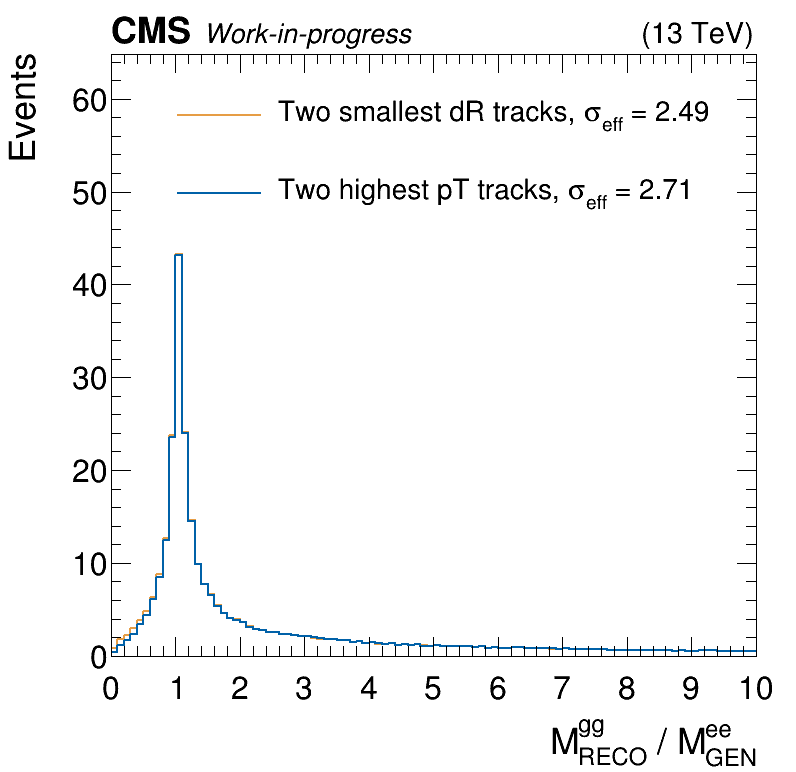

In [9]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)

h1 = rdf.Filter("category == 2").Histo1D(("h1", " ", 100, 0, 10), "meeRatio", "mcwei")
h2 = rdf.Filter("category == 2").Histo1D(("h2", " ", 100, 0, 10), "meeRatioPtMax", "mcwei")

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "M^{gg}_{RECO} / M^{ee}_{GEN}", yaxis = "Events", option = "hist", Log = False)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.7, 0.8, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Two smallest dR tracks,#sigma_{eff} = %.2f" %sigma_dr, "l")
leg.AddEntry(h2.GetPtr(), "Two highest pT tracks,#sigma_{eff} = %.2f" %sigma_pt, "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

In [7]:
import os

outRes = "./plots"
if not os.path.exists(outRes):
    os.makedirs(outRes)
    
c1.Print("{}/GSFtracks.pdf".format(outRes))

Info in <TCanvas::Print>: pdf file ./plots/GSFtracks.pdf has been created
